# ***Key technical indicators for stock market prediction***
งานวิจัยที่เกี่ยวข้อง

In [1]:
!pip install yfinance

In [2]:
# นำเข้าไลบรารีที่จำเป็น
import yfinance as yf               # ไลบรารีสำหรับดึงข้อมูลหุ้นจาก Yahoo Finance
import pandas as pd                 # ไลบรารีสำหรับจัดการข้อมูลแบบตาราง (DataFrame)
from datetime import datetime, timedelta  # โมดูลจัดการวันที่และช่วงเวลา

# รายชื่อหุ้นที่ต้องการดาวน์โหลดข้อมูล
tickers = [
     "GOOGL"]  # list ของ Ticker Symbol หุ้นหลายตัว

# กำหนดช่วงเวลา 10 ปี
end_date = datetime.today()                        # วันสิ้นสุด = วันนี้
start_date = end_date - timedelta(days=5*365)     # วันเริ่มต้น = 10 ปีก่อน (ประมาณ 3650 วัน)

# สร้าง list ว่างเพื่อเก็บข้อมูลหุ้นแต่ละตัว
all_data_list = []

# วนลูปดาวน์โหลดข้อมูลหุ้นแต่ละตัว
for ticker in tickers:
    print(f"📥 Downloading {ticker} ...")  # แสดงข้อความว่ากำลังดาวน์โหลดหุ้นตัวไหน

    # ดาวน์โหลดข้อมูลหุ้นจาก Yahoo Finance ในช่วงที่กำหนด
    data = yf.download(
        ticker,
        start=start_date.strftime('%Y-%m-%d'),  # แปลงวันที่เป็น string 'YYYY-MM-DD'
        end=end_date.strftime('%Y-%m-%d')
    )

    # ตรวจสอบว่ามีข้อมูลหรือไม่
    if data.empty:
        print(f"❌ No data for {ticker}")  # ถ้าไม่มีข้อมูล แสดงข้อความ
        continue                             # ข้ามไปหุ้นตัวถัดไป

    # รีเซ็ต index ของ DataFrame (จาก Date index → column ปกติ)
    data.reset_index(inplace=True)

    # ถ้ามี MultiIndex columns (มักเกิดจาก group_by='ticker') ให้แปลงเป็น columns ปกติ
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = [
            ' '.join(col).strip() if isinstance(col, tuple) else col
            for col in data.columns.values
        ]

    # ฟังก์ชันทำความสะอาดชื่อคอลัมน์ เช่น 'Close GOOGL' → 'Close'
    def clean_columns(cols):
        cleaned = []
        for col in cols:
            if 'Date' in col:               # ถ้าเป็นคอลัมน์วันที่
                cleaned.append('Date')
            else:
                cleaned.append(col.split()[0])  # เอาเฉพาะคำแรก เช่น 'Close', 'Open'
        return cleaned

    # ใช้ฟังก์ชัน clean_columns กับ DataFrame
    data.columns = clean_columns(data.columns)

    # เพิ่มคอลัมน์ Symbol เพื่อเก็บชื่อหุ้น
    data['Symbol'] = ticker.upper()  # ใช้ตัวพิมพ์ใหญ่ให้ uniform

    # กรองเฉพาะคอลัมน์ที่ต้องการ
    wanted_cols = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Symbol']
    data = data[[col for col in wanted_cols if col in data.columns]]  # เฉพาะคอลัมน์ที่มีจริง

    # เพิ่ม DataFrame ของหุ้นตัวนี้ลงใน list
    all_data_list.append(data)

# รวมทุก DataFrame เป็น flat table เดียว
flat_df = pd.concat(all_data_list, ignore_index=True)

# แปลงคอลัมน์ Date เป็น datetime object
flat_df['Date'] = pd.to_datetime(flat_df['Date'])

# ทำให้ Symbol เป็น string แบบ uniform (ตัวพิมพ์ใหญ่)
flat_df['Symbol'] = flat_df['Symbol'].astype(str).str.upper()

# เรียงลำดับก่อน → Symbol, จากนั้น → Date
flat_df = flat_df.sort_values(by=['Symbol', 'Date']).reset_index(drop=True)

# ตรวจสอบชนิดข้อมูลแต่ละคอลัมน์
print(flat_df.dtypes)

# แสดงตัวอย่าง 10 แถวแรก
print(flat_df.head(10))

📥 Downloading GOOGL ...


/tmp/ipython-input-791219495.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
Symbol            object
dtype: object
        Date      Close       High        Low       Open    Volume Symbol
0 2020-08-27  80.940567  81.908259  80.457957  81.839670  31350000  GOOGL
1 2020-08-28  81.482819  81.578247  80.795944  80.987794  22418000  GOOGL
2 2020-08-31  80.990784  81.734819  80.782037  81.688595  26422000  GOOGL
3 2020-09-01  82.260658  82.466425  80.990778  81.121494  22652000  GOOGL
4 2020-09-02  85.357574  85.790479  82.514624  82.903292  49522000  GOOGL
5 2020-09-03  80.989784  84.493271  79.906278  84.469412  63726000  GOOGL
6 2020-09-04  78.589180  81.262145  76.440066  79.970392  55850000  GOOGL
7 2020-09-08  75.725845  77.313818  75.372958  75.795428  54032000  GOOGL
8 2020-09-09  76.900299  77.471368  75.803870  76.983297  39242000  GOOGL
9 2020-09-10  75.847610  78.213920  75.546916  77.046923  33024000  GOO

In [3]:
df=flat_df

In [4]:
df

,Date,Close,High,Low,Open,Volume,Symbol
0,2020-08-27,80.940567,81.908259,80.457957,81.839670,31350000,GOOGL
1,2020-08-28,81.482819,81.578247,80.795944,80.987794,22418000,GOOGL
2,2020-08-31,80.990784,81.734819,80.782037,81.688595,26422000,GOOGL
3,2020-09-01,82.260658,82.466425,80.990778,81.121494,22652000,GOOGL
4,2020-09-02,85.357574,85.790479,82.514624,82.903292,49522000,GOOGL
...,...,...,...,...,...,...,...
1249,2025-08-19,201.570007,203.440002,199.960007,203.029999,24240200,GOOGL
1250,2025-08-20,199.320007,201.279999,196.600006,200.729996,28955500,GOOGL
1251,2025-08-21,199.750000,202.479996,199.429993,199.750000,19774600,GOOGL
1252,2025-08-22,206.089996,208.539993,201.300003,202.729996,42827000,GOOGL


In [5]:
df.dtypes

,0
Date,datetime64[ns]
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64
Symbol,object


In [6]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,1254,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03
mean,2023-02-23 14:31:34.736842240,132.376836,133.846606,130.869074,132.315117,3.219936e+07
min,2020-08-27 00:00:00,70.049385,71.470855,69.689538,69.715885,9.312000e+06
25%,2021-11-23 06:00:00,106.595697,107.423245,104.516681,106.010836,2.333692e+07
50%,2023-02-23 12:00:00,132.489426,133.454625,130.537128,132.408648,2.887440e+07
75%,2024-05-22 18:00:00,156.571541,158.229750,154.244402,155.947085,3.685755e+07
max,2025-08-25 00:00:00,208.490005,210.520004,205.279999,206.429993,1.274901e+08
std,NaN,31.632478,31.884765,31.350346,31.636681,1.365643e+07


หุ้นตัวนี้มีแนวโน้มเติบโตชัดเจนในช่วง 5 ปีที่ผ่านมา จากราคาต่ำสุด ~70 เพิ่มขึ้นสูงสุดกว่า 208 หุ้นมีความผันผวนปานกลางถึงสูง แต่โดยรวมราคาไม่ skew มาก ทำให้ค่าเฉลี่ยและ median ใกล้เคียงกัน ปริมาณซื้อขายบางวัน spike สูง
หุ้นเติบโตต่อเนื่อง

ราคาต่ำสุด 70 → สูงสุด 208

แสดง uptrend ระยะยาว

ความผันผวนปานกลางถึงสูง

ราคากลาง ๆ

Mean Close: 132.38

Median Close (50%): 132.49 → เกือบเท่ากับ mean → ข้อมูลไม่ skew มาก

- ช่วงราคาต่ำสุด–สูงสุด

Min Close: 70.05

Max Close: 208.49

ราคาหุ้นเพิ่มขึ้นเกือบ 3 เท่า ในช่วงเวลานี้ → หุ้นมีแนวโน้มเติบโตชัดเจน

-  Quartiles

25% = 106.60, 75% = 156.57 → ราคาส่วนใหญ่กระจุกตัวระหว่าง 106–157

มีช่วงผันผวน (range) ค่อนข้างกว้าง → ตลาดอาจมี volatility ในบางช่วง

- Std Dev

Std Close = 31.63 → ราคาหุ้นผันผวนปานกลาง

ทำให้เรารู้ว่าราคาอาจขึ้นลง ±31 รอบ mean (~132)

-  ปริมาณซื้อขาย (Volume)

Mean Volume: 32.2 ล้านหุ้น/วัน

Min Volume: 9.3 ล้าน

Max Volume: 127.5 ล้าน → วันซื้อขายสูงสุดมากกว่า 4 เท่าของค่าเฉลี่ย

Quartiles: 25% = 23.3M, 50% = 28.8M, 75% = 36.9M

Std Volume = 13.65M → ปริมาณซื้อขายผันผวนสูง → อาจสะท้อนข่าวหรือเหตุการณ์ตลาด

In [7]:
data=df

/tmp/ipython-input-4267822011.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start="2020-01-01", end="2025-01-01")["Close"]
[*********************100%***********************]  4 of 4 completed


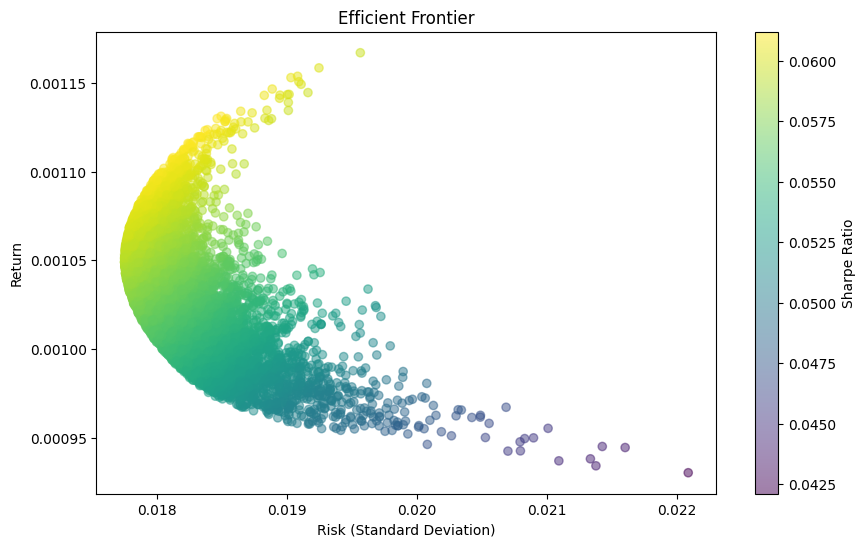

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🔹 เลือกหุ้น (ตัวอย่าง)
symbols = ["AAPL", "MSFT", "GOOGL", "AMZN"]

# 🔹 โหลดข้อมูลราคาหุ้น
data = yf.download(symbols, start="2020-01-01", end="2025-01-01")["Close"]

# 🔹 คำนวณ Daily Return
daily_returns = data.pct_change().dropna()

# 🔹 คำนวณ Mean Return และ Covariance Matrix
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# 🔹 Monte Carlo Simulation
num_portfolios = 10000
results = np.zeros((3, num_portfolios))  # [0]=Return, [1]=Risk, [2]=Weight ของหุ้นตัวแรก

for i in range(num_portfolios):
    weights = np.random.random(len(symbols))
    weights /= np.sum(weights)
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std_dev = np.sqrt(portfolio_variance)

    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = weights[0]  # เก็บ weight ของหุ้นตัวแรก

# 🔹 แสดงกราฟ Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[0, :] / results[1, :], cmap="viridis", alpha=0.5)
plt.title("Efficient Frontier")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Return")
plt.colorbar(label="Sharpe Ratio")
plt.show()


 การตีความ Efficient Frontier สำหรับหุ้น GOOGL
แม้ Efficient Frontier จะใช้กับพอร์ตหลายสินทรัพย์ แต่สามารถตีความสำหรับหุ้นเดี่ยวได้ว่า:

GOOGL เป็นจุดเดียวบนกราฟ ที่มี:
Risk (Standard Deviation): ประมาณ 0.018–0.022
Return: ประมาณ 0.00095–0.00115 ต่อวัน (หรือ ~27% ต่อปี)
Sharpe Ratio: ประมาณ 0.0425–0.0600 → อยู่ในระดับดี
🔍 ตีความ
GOOGL มี ผลตอบแทนต่อความเสี่ยงที่ดี เมื่อเทียบกับหุ้นอื่น ๆ
หากนำไปเปรียบเทียบกับพอร์ตอื่นใน Efficient Frontier:
จุดของ GOOGL อยู่ใกล้เส้นโค้ง → เป็นพอร์ตที่ “มีประสิทธิภาพ”
หากอยู่ด้านบนซ้ายของกราฟ → ถือว่า “คุ้มค่า” ต่อความเสี่ยง
🔮 ข้อเสนอแนะ
หากคุณลงทุนใน GOOGL เพียงตัวเดียว → ถือว่าเป็นหุ้นที่มีแนวโน้มดีและมีประสิทธิภาพ
หากต้องการสร้างพอร์ต → GOOGL สามารถเป็น “แกนหลัก” ของพอร์ตที่มีประสิทธิภาพสูง

In [10]:
# เลือกเฉพาะคอลัมน์ที่ต้องการ
df_selected = df[['Date', 'Close', 'Volume', 'Symbol']]

# ตรวจสอบผลลัพธ์
print(df_selected.head())


        Date      Close    Volume Symbol
0 2020-08-27  80.940567  31350000  GOOGL
1 2020-08-28  81.482819  22418000  GOOGL
2 2020-08-31  80.990784  26422000  GOOGL
3 2020-09-01  82.260658  22652000  GOOGL
4 2020-09-02  85.357574  49522000  GOOGL


In [11]:
df=df_selected

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# เลือกคอลัมน์
df_selected = df[["Date", "Close", "Volume", "Symbol"]].copy()

# แบ่ง train/test 80/20
train_df, test_df = train_test_split(df_selected, test_size=0.2, shuffle=False)

# เรียงตามวันเพื่อความถูกต้อง
train_df = train_df.sort_values(by=["Symbol", "Date"]).reset_index(drop=True)
test_df  = test_df.sort_values(by=["Symbol", "Date"]).reset_index(drop=True)

# ===============================
# Feature Engineering
# ===============================




In [17]:
def add_features(df):
    # --- SMA ---
    df["SMA_5"]  = df.groupby("Symbol")["Close"].transform(lambda x: x.rolling(5).mean())
    df["SMA_10"] = df.groupby("Symbol")["Close"].transform(lambda x: x.rolling(10).mean())

    # --- EMA ---
    df["EMA_5"]  = df.groupby("Symbol")["Close"].transform(lambda x: x.ewm(span=5, adjust=False).mean())
    df["EMA_10"] = df.groupby("Symbol")["Close"].transform(lambda x: x.ewm(span=10, adjust=False).mean())

    # --- MACD ---
    df["EMA_12"] = df.groupby("Symbol")["Close"].transform(lambda x: x.ewm(span=12, adjust=False).mean())
    df["EMA_26"] = df.groupby("Symbol")["Close"].transform(lambda x: x.ewm(span=26, adjust=False).mean())
    df["MACD"]   = df["EMA_12"] - df["EMA_26"]
    df["MACD_Signal"] = df.groupby("Symbol")["MACD"].transform(lambda x: x.ewm(span=9, adjust=False).mean())

    # --- Trend ---
    df["Trend"] = df.groupby("Symbol")["Close"].diff().apply(lambda x: 1 if x > 0 else 0)

    # --- Trend_Streak ---
    def streak(s):
        # หาว่าแต่ละ run ต่อเนื่องยาวกี่วัน
        return s * (s.groupby((s != s.shift()).cumsum()).cumcount() + 1)

    df["Trend_Streak"] = df.groupby("Symbol")["Trend"].transform(streak)

    return df


Index(['Date', 'Close', 'Volume', 'Symbol', 'SMA_5', 'SMA_10', 'EMA_5',
       'EMA_10', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'Trend',
       'Trend_Streak'],
      dtype='object')


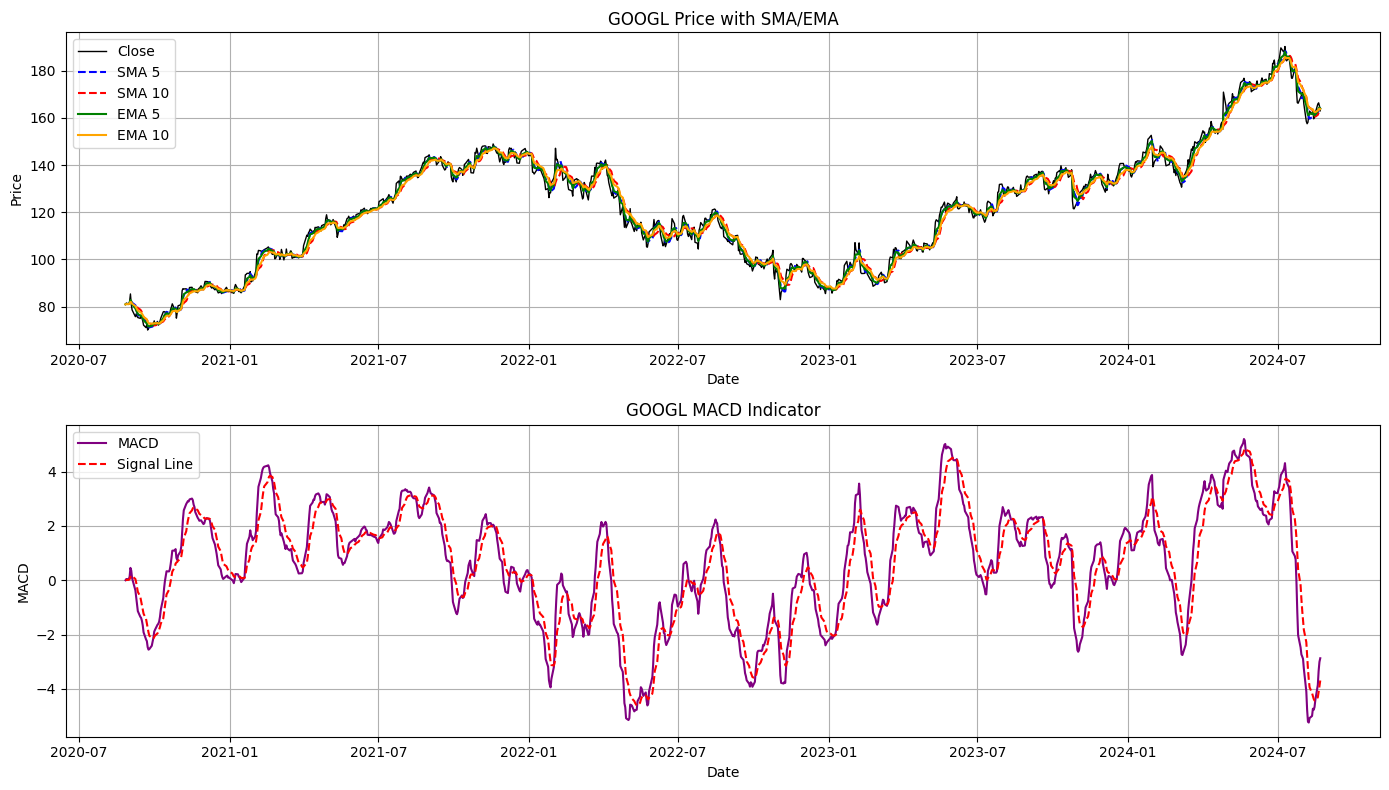

In [34]:
# ====== เรียกสร้าง Feature Engineering ======
train_df = add_features(train_df)
test_df  = add_features(test_df)

# ====== ตรวจสอบว่ามีคอลัมน์หรือยัง ======
print(train_df.columns)

# ====== Plot ตัวอย่างหุ้นแรก ======
import matplotlib.pyplot as plt

symbol = train_df["Symbol"].unique()[0]   # เลือกหุ้นตัวแรกใน dataset
plot_df = train_df[train_df["Symbol"] == symbol].copy()

plt.figure(figsize=(14,8))

# Subplot 1: Close + SMA/EMA
plt.subplot(2,1,1)
plt.plot(plot_df["Date"], plot_df["Close"], label="Close", color="black", linewidth=1)
plt.plot(plot_df["Date"], plot_df["SMA_5"], label="SMA 5", color="blue", linestyle="--")
plt.plot(plot_df["Date"], plot_df["SMA_10"], label="SMA 10", color="red", linestyle="--")
plt.plot(plot_df["Date"], plot_df["EMA_5"], label="EMA 5", color="green")
plt.plot(plot_df["Date"], plot_df["EMA_10"], label="EMA 10", color="orange")

plt.title(f"{symbol} Price with SMA/EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

# Subplot 2: MACD
plt.subplot(2,1,2)
plt.plot(plot_df["Date"], plot_df["MACD"], label="MACD", color="purple")
plt.plot(plot_df["Date"], plot_df["MACD_Signal"], label="Signal Line", color="red", linestyle="--")

plt.title(f"{symbol} MACD Indicator")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


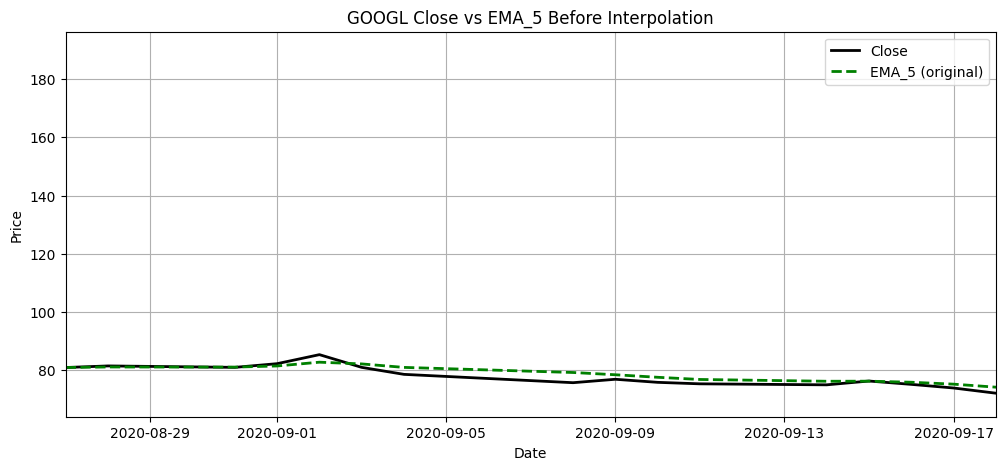

In [35]:
import matplotlib.pyplot as plt

# เลือกหุ้นตัวอย่าง
symbol = train_df["Symbol"].unique()[0]
df_symbol = train_df[train_df["Symbol"] == symbol].copy()
plt.figure(figsize=(12,5))

# Plot Close ราคาปิด
plt.plot(df_symbol["Date"], df_symbol["Close"], label="Close", color="black", linewidth=2)

# Plot EMA_5 ก่อน interpolation
plt.plot(df_symbol["Date"], df_symbol["EMA_5"], label="EMA_5 (original)", color="green", linestyle="--", linewidth=2)

plt.title(f"{symbol} Close vs EMA_5 Before Interpolation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

# Zoom ช่วงต้น 15 วัน เพื่อดู Missing Value ชัด
plt.xlim(df_symbol["Date"].iloc[0], df_symbol["Date"].iloc[15])

plt.show()



# ***จัดการค่า Missing Value ด้วยเทคนิค  Linear Interpolation***

ทำไมใช้ Linear Interpolation

Linear Interpolation = เติมค่ากลางระหว่างจุดสองจุดที่รู้ค่า

ตัวอย่าง:

วันก่อนหน้า Close = 100

วันถัดไป Close = 110

วันที่ขาดหายไป 1 วัน → เติม 105 (ค่าเฉลี่ยระหว่าง 100 และ 110)

***ข้อดี:***

ไม่บิดเบือนแนวโน้มมาก → ราคาหุ้นมักเปลี่ยนแบบ smooth

***ข้อเสีย:***

ถ้าหายหลายวันติดกัน → linear อาจไม่แม่น

ข้อมูลที่มีความผันผวนสูง → linear อาจ oversimplify

โดยสรุป: Linear Interpolation เหมาะสำหรับ เติมค่า missing ของค่า indicator ที่เปลี่ยนแปลงแบบต่อเนื่อง เช่น SMA, EMA, MACD

In [27]:
# เติมค่า NaN ด้วย linear interpolation
train_df_interpolated = train_df.interpolate(method='linear')
test_df_interpolated  = test_df.interpolate(method='linear')

# ตรวจสอบ
print(train_df_interpolated.head(10))
print(test_df_interpolated.head(10))


        Date      Close    Volume Symbol      SMA_5     SMA_10      EMA_5  \
0 2020-08-27  80.940567  31350000  GOOGL        NaN        NaN  80.940567   
1 2020-08-28  81.482819  22418000  GOOGL        NaN        NaN  81.121318   
2 2020-08-31  80.990784  26422000  GOOGL        NaN        NaN  81.077806   
3 2020-09-01  82.260658  22652000  GOOGL        NaN        NaN  81.472090   
4 2020-09-02  85.357574  49522000  GOOGL  82.206480        NaN  82.767252   
5 2020-09-03  80.989784  63726000  GOOGL  82.216324        NaN  82.174763   
6 2020-09-04  78.589180  55850000  GOOGL  81.637596        NaN  80.979568   
7 2020-09-08  75.725845  54032000  GOOGL  80.584608        NaN  79.228327   
8 2020-09-09  76.900299  39242000  GOOGL  79.512537        NaN  78.452318   
9 2020-09-10  75.847610  33024000  GOOGL  77.610544  79.908512  77.584082   

      EMA_10     EMA_12     EMA_26      MACD  MACD_Signal  Trend  Trend_Streak  
0  80.940567  80.940567  80.940567  0.000000     0.000000      0       

/tmp/ipython-input-1615919091.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  train_df_interpolated = train_df.interpolate(method='linear')
/tmp/ipython-input-1615919091.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  test_df_interpolated  = test_df.interpolate(method='linear')


/tmp/ipython-input-2017183143.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interp = df_symbol.interpolate(method='linear')


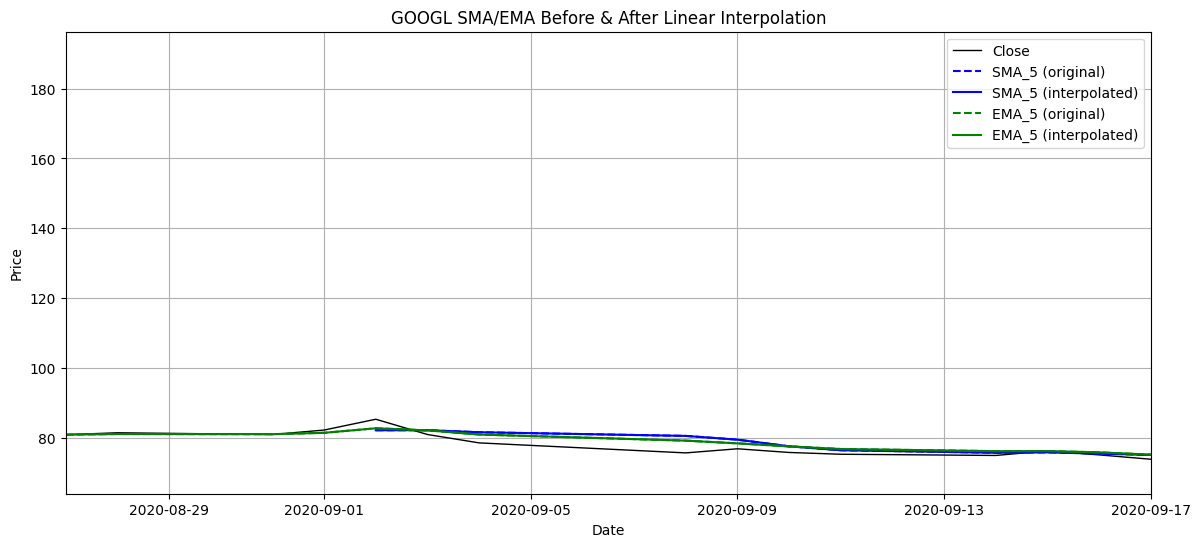

In [36]:
import matplotlib.pyplot as plt

# เลือกหุ้นตัวอย่าง
symbol = train_df["Symbol"].unique()[0]
df_symbol = train_df[train_df["Symbol"] == symbol].copy()

# สร้างสำเนาเพื่อเติมค่า Linear Interpolation
df_interp = df_symbol.interpolate(method='linear')

plt.figure(figsize=(14,6))

# Plot Close ราคา
plt.plot(df_symbol["Date"], df_symbol["Close"], label="Close", color="black", linewidth=1)

# Plot SMA_5 ก่อน interpolation
plt.plot(df_symbol["Date"], df_symbol["SMA_5"], label="SMA_5 (original)", color="blue", linestyle="--")

# Plot SMA_5 หลัง interpolation
plt.plot(df_interp["Date"], df_interp["SMA_5"], label="SMA_5 (interpolated)", color="blue")

# Plot EMA_5 ก่อน interpolation
plt.plot(df_symbol["Date"], df_symbol["EMA_5"], label="EMA_5 (original)", color="green", linestyle="--")

# Plot EMA_5 หลัง interpolation
plt.plot(df_interp["Date"], df_interp["EMA_5"], label="EMA_5 (interpolated)", color="green")

plt.title(f"{symbol} SMA/EMA Before & After Linear Interpolation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

# ====== Zoom ช่วงต้น 15 วัน ======
plt.xlim(df_symbol["Date"].iloc[0], df_symbol["Date"].iloc[14])

plt.show()


# ***ก่อนการเติมค่า Missing Value***
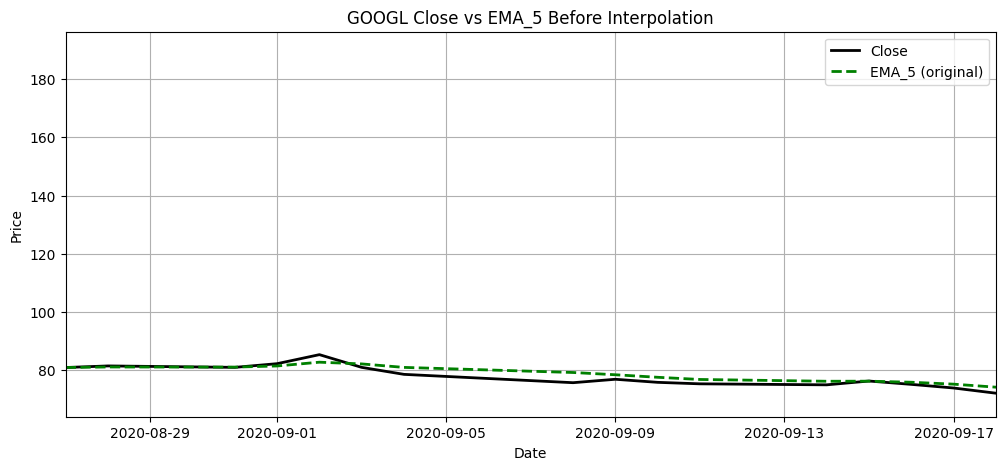

# ***Linear Interpolation ไม่ error กับ NaN เพราะมันใช้ สูตรเชิงเส้นระหว่างค่าที่มีอยู่ แทนที่จะใช้ NaN ตรง ๆ***

In [37]:
train_df

,Date,Close,Volume,Symbol,SMA_5,SMA_10,EMA_5,EMA_10,EMA_12,EMA_26,MACD,MACD_Signal,Trend,Trend_Streak
0,2020-08-27,80.940567,31350000,GOOGL,NaN,NaN,80.940567,80.940567,80.940567,80.940567,0.000000,0.000000,0,0
1,2020-08-28,81.482819,22418000,GOOGL,NaN,NaN,81.121318,81.039158,81.023990,80.980734,0.043257,0.008651,1,1
2,2020-08-31,80.990784,26422000,GOOGL,NaN,NaN,81.077806,81.030363,81.018882,80.981478,0.037403,0.014402,0,0
3,2020-09-01,82.260658,22652000,GOOGL,NaN,NaN,81.472090,81.254053,81.209924,81.076232,0.133692,0.038260,1,1
4,2020-09-02,85.357574,49522000,GOOGL,82.206480,NaN,82.767252,82.000148,81.848024,81.393369,0.454655,0.121539,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2024-08-16,162.174408,24208600,GOOGL,161.433997,160.548288,161.446808,162.416414,163.066892,167.474616,-4.407724,-4.423802,1,2
999,2024-08-19,165.866531,22416200,GOOGL,162.305774,161.286711,162.920049,163.043708,163.497606,167.355499,-3.857893,-4.310620,1,3
1000,2024-08-20,166.374069,18341500,GOOGL,162.906863,162.171426,164.071389,163.649228,163.940138,167.282800,-3.342662,-4.117029,1,4
1001,2024-08-21,165.050491,22902000,GOOGL,163.997586,162.859094,164.397756,163.904003,164.110962,167.117444,-3.006482,-3.894919,0,0


In [40]:
indicators = ["SMA_5","SMA_10","EMA_5","EMA_10","EMA_12","EMA_26","MACD","MACD_Signal","Trend_Streak"]
train_df[indicators] = train_df[indicators].interpolate(method='linear')


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[indicators] = scaler.fit_transform(train_df[indicators])

# ตรวจสอบ
print(train_df[indicators].head())


      SMA_5  SMA_10     EMA_5    EMA_10    EMA_12    EMA_26      MACD  \
0       NaN     NaN -1.616352 -1.615460 -1.615084 -1.614756 -0.282435   
1       NaN     NaN -1.609185 -1.611533 -1.611755 -1.613129 -0.262571   
2       NaN     NaN -1.610910 -1.611883 -1.611959 -1.613099 -0.265259   
3       NaN     NaN -1.595276 -1.602973 -1.604335 -1.609260 -0.221043   
4 -1.575629     NaN -1.543920 -1.573255 -1.578872 -1.596412 -0.073657   

   MACD_Signal  Trend_Streak  
0    -0.312152     -0.783869  
1    -0.307864     -0.074284  
2    -0.305014     -0.783869  
3    -0.293189     -0.074284  
4    -0.251911      0.635302  


In [42]:
train_df

,Date,Close,Volume,Symbol,SMA_5,SMA_10,EMA_5,EMA_10,EMA_12,EMA_26,MACD,MACD_Signal,Trend,Trend_Streak
0,2020-08-27,80.940567,31350000,GOOGL,NaN,NaN,-1.616352,-1.615460,-1.615084,-1.614756,-0.282435,-0.312152,0,-0.783869
1,2020-08-28,81.482819,22418000,GOOGL,NaN,NaN,-1.609185,-1.611533,-1.611755,-1.613129,-0.262571,-0.307864,1,-0.074284
2,2020-08-31,80.990784,26422000,GOOGL,NaN,NaN,-1.610910,-1.611883,-1.611959,-1.613099,-0.265259,-0.305014,0,-0.783869
3,2020-09-01,82.260658,22652000,GOOGL,NaN,NaN,-1.595276,-1.602973,-1.604335,-1.609260,-0.221043,-0.293189,1,-0.074284
4,2020-09-02,85.357574,49522000,GOOGL,-1.575629,NaN,-1.543920,-1.573255,-1.578872,-1.596412,-0.073657,-0.251911,1,0.635302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2024-08-16,162.174408,24208600,GOOGL,1.572063,1.548033,1.575898,1.629854,1.662137,1.890927,-2.306467,-2.504844,1,0.635302
999,2024-08-19,165.866531,22416200,GOOGL,1.606698,1.577583,1.634315,1.654840,1.679325,1.886102,-2.053984,-2.448745,1,1.344888
1000,2024-08-20,166.374069,18341500,GOOGL,1.630580,1.612986,1.679968,1.678959,1.696984,1.883157,-1.817389,-2.352790,1,2.054474
1001,2024-08-21,165.050491,22902000,GOOGL,1.673914,1.640504,1.692909,1.689107,1.703801,1.876458,-1.663015,-2.242699,0,-0.783869


Indicators ถูกคำนวณครบ

Missing Value ถูกเติม

ค่า indicators ถูก standardize → ลด bias และผลกระทบจาก outlier

In [43]:
# ตัวอย่าง features
features = ["SMA_5","SMA_10","EMA_5","EMA_10","EMA_12","EMA_26","MACD","MACD_Signal","Trend_Streak"]

X_train = train_df[features]
y_train = train_df["Close"]  # หรือราคาที่คุณตั้งเป็น target


In [44]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# ตรวจสอบ feature importance
importances = rf_model.feature_importances_
for f, imp in zip(features, importances):
    print(f"{f}: {imp:.3f}")


SMA_5: 0.023
SMA_10: 0.009
EMA_5: 0.924
EMA_10: 0.023
EMA_12: 0.013
EMA_26: 0.005
MACD: 0.001
MACD_Signal: 0.001
Trend_Streak: 0.001


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

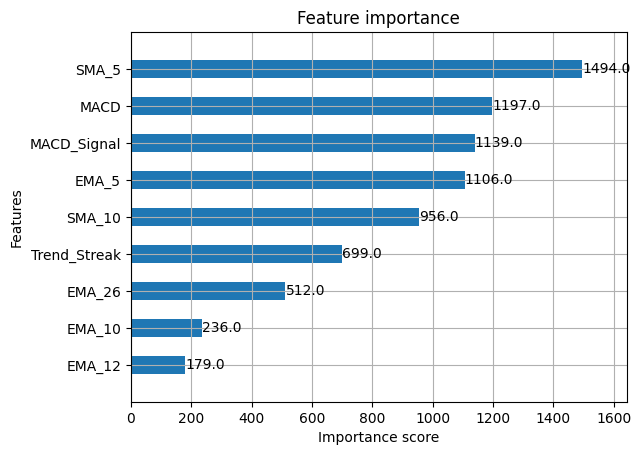

In [45]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# feature importance
xgb.plot_importance(xgb_model, height=0.5)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2049
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 9
[LightGBM] [Info] Start training from score 121.869293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

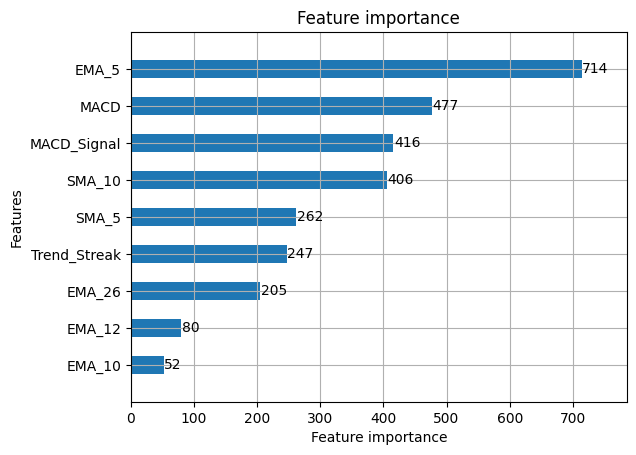

In [46]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)

# feature importance
lgb.plot_importance(lgb_model, max_num_features=10, height=0.5)


In [47]:
X_test = test_df[features]
y_test = test_df["Close"]

rf_pred  = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
lgb_pred = lgb_model.predict(X_test)


In [49]:
# ติดตั้งหลาย package พร้อมกัน
!pip install pandas numpy matplotlib scikit-learn xgboost lightgbm


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, name):
    print(f"=== {name} ===")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print("RMSE:", rmse)
    print("R2  :", r2_score(y_true, y_pred))

# Evaluate models
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, xgb_pred, "XGBoost")
evaluate_model(y_test, lgb_pred, "LightGBM")



=== Random Forest ===
MAE : 14.212679554289556
RMSE: 16.26077815150271
R2  : -0.17560259607969764
=== XGBoost ===
MAE : 13.798608483546284
RMSE: 15.45262614864318
R2  : -0.061652733742438626
=== LightGBM ===
MAE : 14.044135288129949
RMSE: 15.951675140814936
R2  : -0.13133306477111284


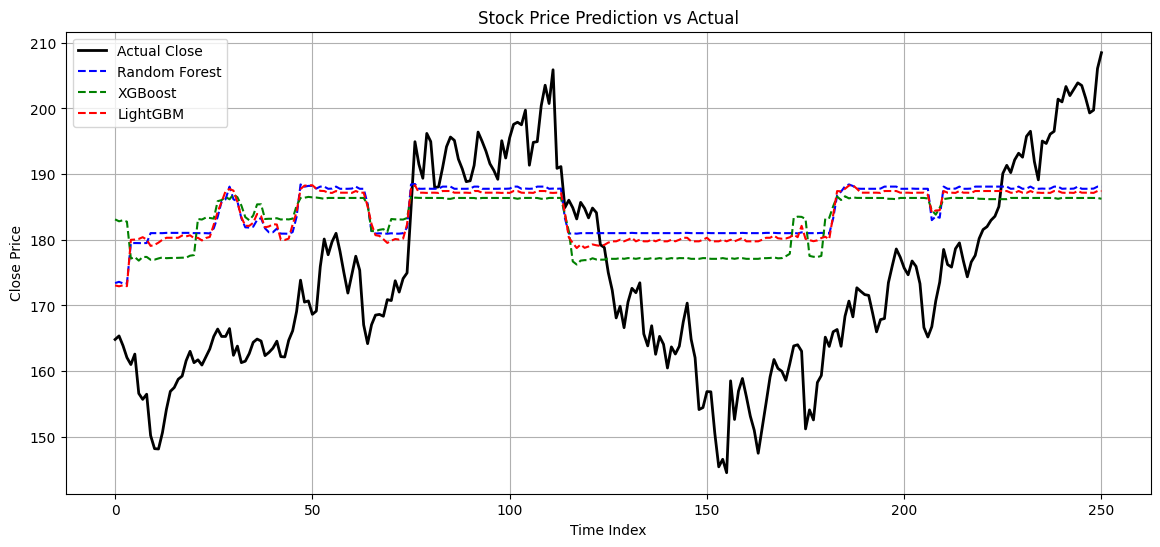

In [52]:
import matplotlib.pyplot as plt

# สมมติ y_test, rf_pred, xgb_pred, lgb_pred มีแล้ว
plt.figure(figsize=(14,6))

# ราคาจริง
plt.plot(y_test.values, label="Actual Close", color="black", linewidth=2)

# Random Forest
plt.plot(rf_pred, label="Random Forest", color="blue", linestyle="--")

# XGBoost
plt.plot(xgb_pred, label="XGBoost", color="green", linestyle="--")

# LightGBM
plt.plot(lgb_pred, label="LightGBM", color="red", linestyle="--")

plt.title("Stock Price Prediction vs Actual")
plt.xlabel("Time Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


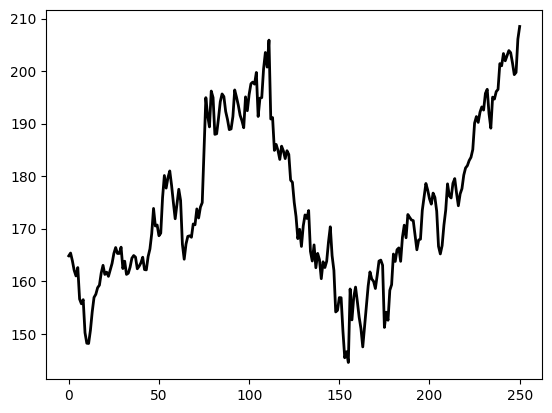

In [55]:
# ราคาปิดจริง
plt.plot(y_test.values, label="Actual Close", color="black", linewidth=2)

In [56]:
# สร้าง target แบบ binary: 1 = ราคาขึ้น, 0 = ราคาลง
import numpy as np

y_test_class = (y_test.diff() > 0).astype(int)[1:]  # skip first diff = NaN
rf_pred_class  = (np.diff(rf_pred) > 0).astype(int)
xgb_pred_class = (np.diff(xgb_pred) > 0).astype(int)
lgb_pred_class = (np.diff(lgb_pred) > 0).astype(int)


In [58]:
from sklearn.metrics import f1_score, confusion_matrix

def evaluate_class(y_true, y_pred, name):
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    # IoU สำหรับ binary = TP / (TP+FP+FN)
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    iou = TP / (TP + FP + FN)
    print(f"=== {name} ===")
    print("F1-score :", f1)
    print("IoU      :", iou)
    print("Confusion Matrix:\n", cm)

evaluate_class(y_test_class.values, rf_pred_class, "Random Forest")
evaluate_class(y_test_class.values, xgb_pred_class, "XGBoost")
evaluate_class(y_test_class.values, lgb_pred_class, "LightGBM")

=== Random Forest ===
F1-score : 0.6173913043478261
IoU      : 0.44654088050314467
Confusion Matrix:
 [[91 23]
 [65 71]]
=== XGBoost ===
F1-score : 0.5843621399176955
IoU      : 0.4127906976744186
Confusion Matrix:
 [[78 36]
 [65 71]]
=== LightGBM ===
F1-score : 0.6120689655172413
IoU      : 0.4409937888198758
Confusion Matrix:
 [[89 25]
 [65 71]]


# ***สรุป Insight***

โมเดลทำนายทิศทางราคาขึ้น/ลงได้ ~60% → ดีกว่าการทายแบบสุ่ม แต่ยังไม่แม่นมาก

Random Forest และ LightGBM ให้ performance ใกล้เคียงกัน และ ทำนายราคาลงได้แม่นกว่า XGBoost

XGBoost ทำนายราคาขึ้นได้ดี แต่ราคาลงบางครั้งผิดพลาดมากขึ้น → F1-score ต่ำกว่า

IoU แสดงว่า overlap ของ prediction กับจริงประมาณ 40–45% → แปลว่าโมเดลยังมี room for improvement

F1-score ~0.58–0.62 → โมเดลมีความแม่นในการทำนาย ทิศทางราคาขึ้น/ลง ประมาณ 60%

IoU ~0.41–0.45 → Intersection over Union แสดงว่าพยากรณ์ถูกประมาณ 40–45% ของครั้งที่ราคาขึ้นจริง

แถว = Actual (0=ลง, 1=ขึ้น)

คอลัมน์ = Predicted

TP = 71 → ราคาขึ้นทำนายถูก

TN = 91 → ราคาลงทำนายถูก

FP = 23 → ราคาลงแต่ทำนายขึ้น

FN = 65 → ราคาขึ้นแต่ทำนายลง

Random Forest ทำนาย ราคาลงแม่นกว่า ราคาขึ้น เล็กน้อย

TP = 71, TN = 78

Accuracy ราคาลง ลดลง → F1-score ต่ำสุด 0.584

โมเดล bias ไปทำนายราคาขึ้นมากขึ้น (FP เพิ่มขึ้น)

TP = 71, TN = 89 → ค่าคล้าย Random Forest

F1-score 0.612 → ใกล้ Random Forest